In [11]:
import pandas as pd
import numpy as np
import keras
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import cv2
import math
from tensorflow.keras.utils import plot_model

In [12]:
from keras.utils import plot_model
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization, Activation
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from keras.layers import concatenate
from keras.optimizers import Adam
from keras.regularizers import l1, l2
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from keras import regularizers
from keras.callbacks import EarlyStopping,ModelCheckpoint
import seaborn as sns
from keras.layers import SeparableConv2D


In [13]:
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense, SeparableConv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers

In [15]:
# Prepare the data generators
train_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)

train_generator = train_data_gen.flow_from_directory(
    'cv_faces/train/',
    target_size=(48, 48),
    batch_size=64,
    color_mode="grayscale",
    class_mode='categorical'
)

validation_generator = validation_data_gen.flow_from_directory(
    'cv_faces/test/',
    target_size=(48, 48),
    batch_size=64,
    color_mode="grayscale",
    class_mode='categorical'
)

Found 13011 images belonging to 5 classes.
Found 2229 images belonging to 5 classes.


In [16]:
# Convert the generators to tf.data.Dataset
train_dataset = tf.data.Dataset.from_generator(
    lambda: train_generator,
    output_signature=(
        tf.TensorSpec(shape=(None, 48, 48, 1), dtype=tf.float32),
        tf.TensorSpec(shape=(None, 5), dtype=tf.float32))
)

validation_dataset = tf.data.Dataset.from_generator(
    lambda: validation_generator,
    output_signature=(
        tf.TensorSpec(shape=(None, 48, 48, 1), dtype=tf.float32),
        tf.TensorSpec(shape=(None, 5), dtype=tf.float32))
)

In [17]:
# Repeat the datasets
train_dataset = train_dataset.repeat()
validation_dataset = validation_dataset.repeat()

In [18]:
# Build the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48, 1)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(96, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(96, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(SeparableConv2D(128, (3, 3), padding='same', activation='relu'))
model.add(SeparableConv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(5, activation='softmax'))

In [19]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 48, 48, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 24, 24, 96)     │        55,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 24, 24, 96)     │        83,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 24, 24, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 12, 12, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 12, 12, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_2              │ (None, 12, 12, 128)    │        13,280 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_3              │ (None, 12, 12, 128)    │        17,664 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,371,557 (5.23 MB)

 Trainable params: 1,370,469 (5.23 MB)

 Non-trainable params: 1,088 (4.25 KB)

In [20]:
cv2.ocl.setUseOpenCL(False)

In [21]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

In [22]:
# Train the model
emotion_model_info = model.fit(
    x=train_dataset,
    steps_per_epoch=math.ceil(13011 / 64),
    epochs=50,
    validation_data=validation_dataset,
    validation_steps=math.ceil(2229 / 64)
)

Epoch 1/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 140s 679ms/step - accuracy: 0.2274 - loss: 7.1912 - val_accuracy: 0.2086 - val_loss: 6.0123
Epoch 2/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 137s 673ms/step - accuracy: 0.3022 - loss: 6.2878 - val_accuracy: 0.2086 - val_loss: 5.6622
Epoch 3/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1152s 6s/step - accuracy: 0.3366 - loss: 5.6648 - val_accuracy: 0.3410 - val_loss: 5.1519
Epoch 4/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 196s 959ms/step - accuracy: 0.3838 - loss: 5.1666 - val_accuracy: 0.4347 - val_loss: 4.5962
Epoch 5/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 175s 860ms/step - accuracy: 0.4045 - loss: 4.7188 - val_accuracy: 0.4590 - val_loss: 4.2112
Epoch 6/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 164s 806ms/step - accuracy: 0.4244 - loss: 4.3087 - val_accuracy: 0.4657 - val_loss: 3.8746
Epoch 7/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 166s 813ms/step - accuracy: 0.4486 - loss: 3.9140 - val_accuracy: 0.4890 - val_loss: 3.5415
Epoch 8/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 143s 703ms/step - accuracy: 0.4836 - l

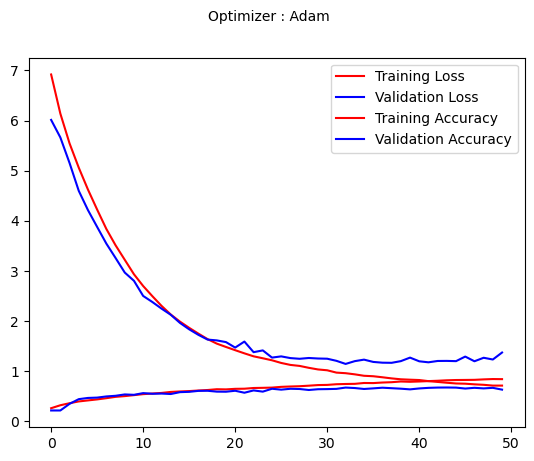

In [23]:
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.plot(emotion_model_info.history["loss"],'r', label="Training Loss")
plt.plot(emotion_model_info.history["val_loss"],'b', label="Validation Loss")
plt.legend()


plt.plot(emotion_model_info.history["accuracy"],'r',label="Training Accuracy")
plt.plot(emotion_model_info.history["val_accuracy"],'b',label="Validation Accuracy")
plt.legend()

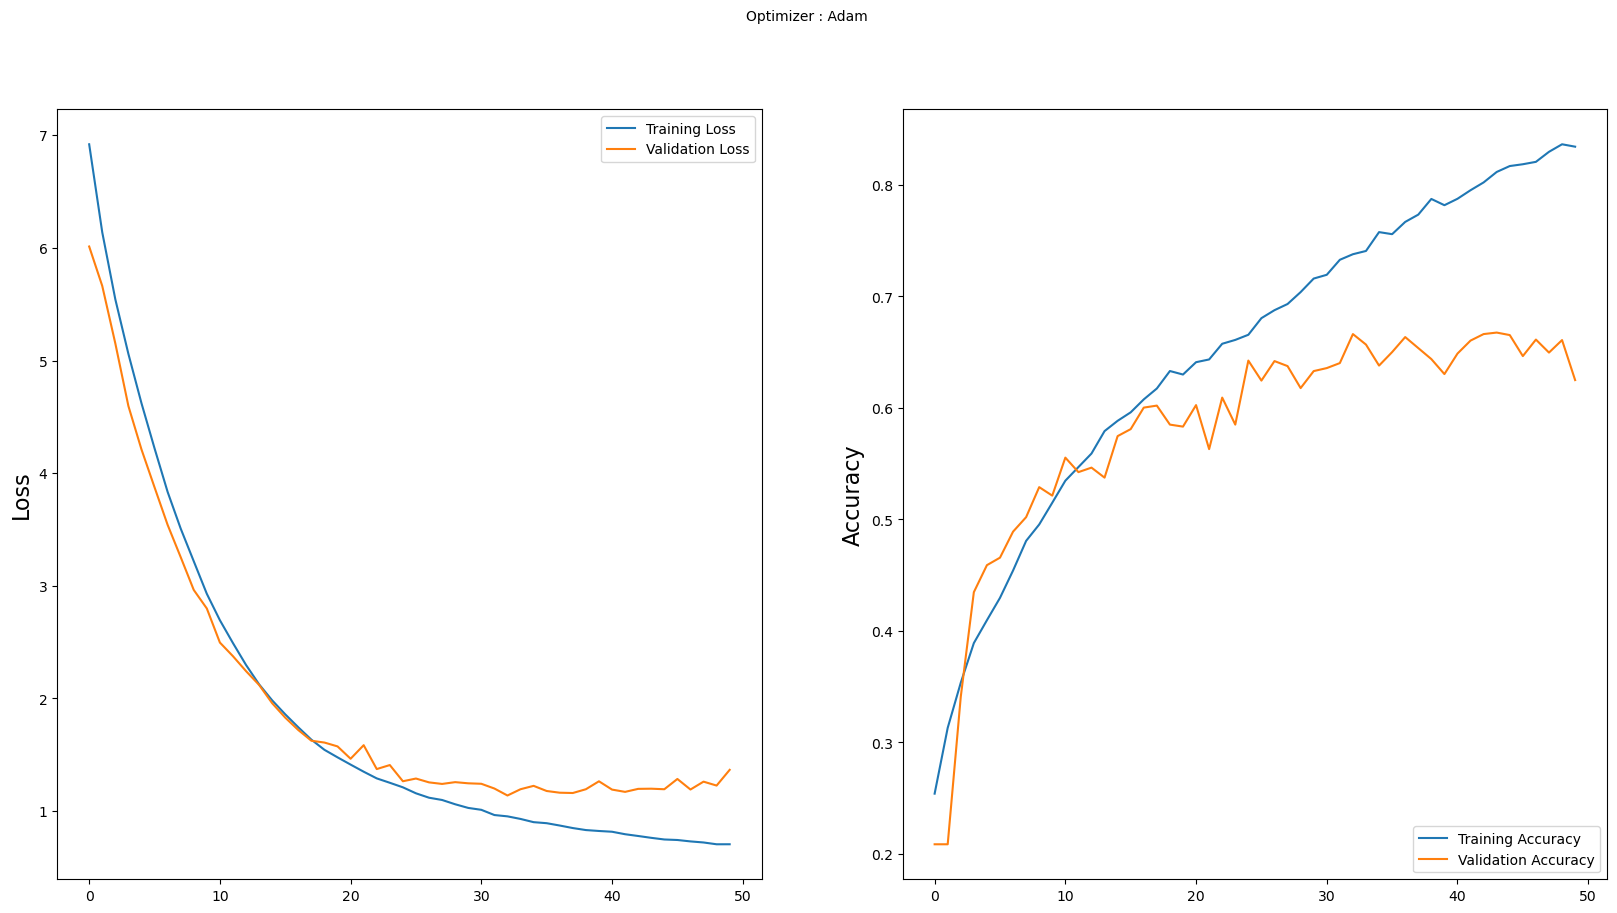

In [24]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(emotion_model_info.history['loss'], label='Training Loss')
plt.plot(emotion_model_info.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(emotion_model_info.history['accuracy'], label='Training Accuracy')
plt.plot(
    emotion_model_info.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [25]:
import numpy as np

# Prepare lists to accumulate the batches
X_test_batches = []
y_test_batches = []

# Loop through the generator to extract batches
for _ in range(len(validation_generator)):
    X_test, y_test = next(validation_generator)
    X_test_batches.append(X_test)
    y_test_batches.append(y_test)

# Concatenate the batches into a single array
X_test = np.concatenate(X_test_batches, axis=0)
y_test = np.concatenate(y_test_batches, axis=0)


In [26]:
loss = model.evaluate(X_test,y_test) 
print("Test Acc: " + str(loss[1]))

70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.6161 - loss: 1.4101
Test Acc: 0.6222521066665649


In [27]:
preds = model.predict(X_test)
y_pred = np.argmax(preds , axis = 1 )

70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step


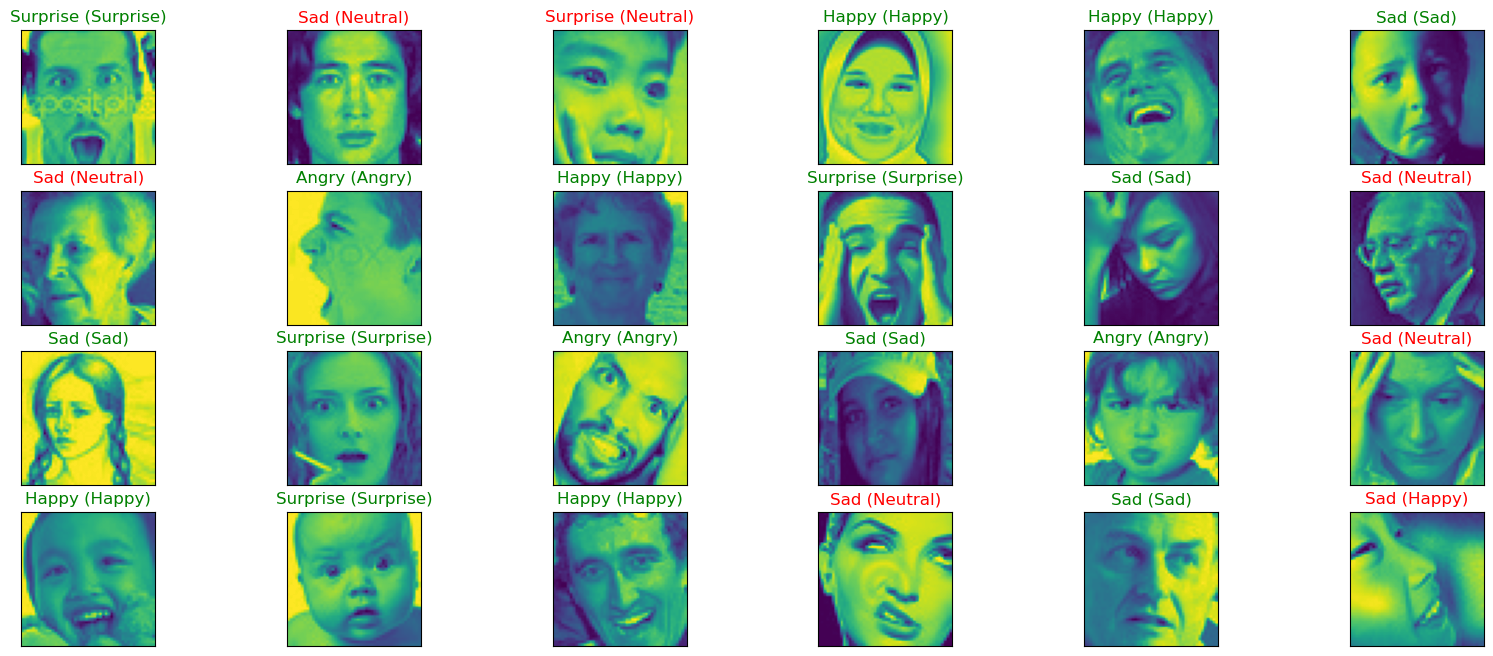

In [28]:
#seeing predicted emotion and actual emotion of a randomly generated particular image of the testing dataset

label_dict = {0 : 'Angry', 1 : 'Happy', 2 : 'Neutral', 3 : 'Sad', 4 : 'Surprise'}

figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=24, replace=False)):
    ax = figure.add_subplot(4, 6, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[index]))
    predict_index = label_dict[(y_pred[index])]
    true_index = label_dict[np.argmax(y_test,axis=1)[index]]
    
    ax.set_title("{} ({})".format((predict_index), 
                                  (true_index)),
                                  color=("green" if predict_index == true_index else "red"))

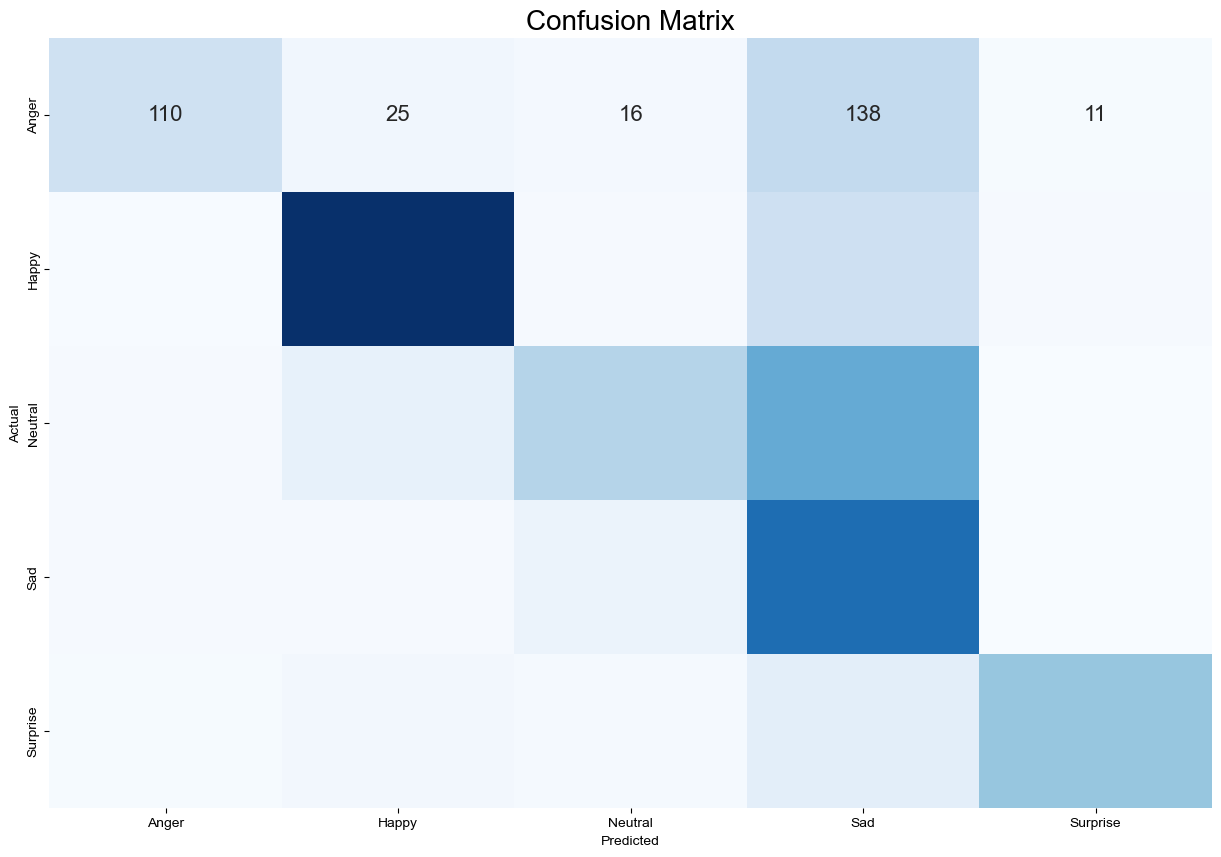

In [29]:
CLASS_LABELS  = ['Anger', 'Happy', 'Neutral', 'Sad', 'Surprise']

cm_data = confusion_matrix(np.argmax(y_test, axis = 1 ), y_pred)
cm = pd.DataFrame(cm_data, columns=CLASS_LABELS, index = CLASS_LABELS)
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (15,10))
plt.title('Confusion Matrix', fontsize = 20)
sns.set(font_scale=1.2)
ax = sns.heatmap(cm, cbar=False, cmap="Blues", annot=True, annot_kws={"size": 16}, fmt='g')

In [30]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test, axis = 1 ),y_pred,digits=3))

              precision    recall  f1-score   support

           0      0.714     0.367     0.485       300
           1      0.831     0.779     0.804       662
           2      0.669     0.323     0.435       496
           3      0.406     0.857     0.551       461
           4      0.848     0.665     0.745       310

    accuracy                          0.622      2229
   macro avg      0.694     0.598     0.604      2229
weighted avg      0.694     0.622     0.619      2229



In [31]:
# Save the model using the native Keras format
model.save('my_model4.keras')

# Save the model to a file named 'model.h5'
model.save('model4.h5')

# Convert model architecture to JSON format
model_json = model.to_json()

# Save JSON to a file
with open("my_model4.json", "w") as json_file:
    json_file.write(model_json)